# CreditCard_Froud_Detection

### Problem Statement:
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Checking the shape
df.shape

(284807, 31)

In [5]:
# Checking the datatypes and null/non-null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Describe the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.758702e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.252296e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.637438e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.316234e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.592013e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.247308e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.050183e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.692882e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179710e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
# checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Checking the class distribution of the target variable
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0 --> Normal Transaction

1 --> fraudulent transaction

C:\Users\metal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


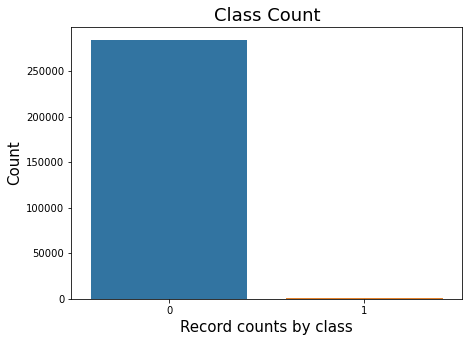

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [10]:
# separating the data for analysis
normal = df[df.Class == 0]
fraud = df[df.Class == 1]

In [11]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
# statistical measures of the data
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions
### Number of Fraudulent Transactions --> 492

In [14]:
normal_sample =normal.sample(n=492)

In [15]:
new_df = pd.concat([normal_sample, fraud], axis=0)

In [16]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
148735,90160.0,0.081018,0.894070,-0.160411,-0.862489,1.333926,0.299652,0.774361,0.007135,0.998982,...,-0.429483,-0.878976,-0.017873,-0.412896,-0.368262,0.113777,0.209954,0.077949,8.99,0
263328,160898.0,2.045585,0.032872,-1.828013,0.230040,0.579916,-0.317066,0.003974,0.003436,0.379854,...,-0.337127,-0.932496,0.307079,0.103411,-0.290491,0.181097,-0.069039,-0.046204,0.99,0
110282,71755.0,-0.194518,0.884670,1.212312,0.660719,1.251288,0.978645,0.694024,-0.028039,-0.946654,...,0.024518,0.325740,-0.310413,-1.316105,-0.188313,-0.289456,0.021719,-0.091831,8.00,0
121474,76208.0,1.031334,-1.333005,1.031624,-0.224395,-1.920613,-0.341794,-0.958476,0.046173,0.083697,...,-0.398421,-0.873860,0.021672,0.410445,-0.079231,0.946472,-0.040027,0.046349,159.00,0
277133,167483.0,1.900072,-0.090357,-1.968147,0.502056,0.959031,0.758942,-0.230705,0.280824,0.856058,...,0.043133,0.491765,0.153127,-0.424753,-0.123097,0.706659,0.004586,-0.035091,10.00,0


In [17]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

### Splitting the data 

In [18]:
x = new_df.drop(columns='Class', axis=1)
y = new_df['Class']

In [19]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
148735,90160.0,0.081018,0.894070,-0.160411,-0.862489,1.333926,0.299652,0.774361,0.007135,0.998982,...,0.024823,-0.429483,-0.878976,-0.017873,-0.412896,-0.368262,0.113777,0.209954,0.077949,8.99
263328,160898.0,2.045585,0.032872,-1.828013,0.230040,0.579916,-0.317066,0.003974,0.003436,0.379854,...,-0.196196,-0.337127,-0.932496,0.307079,0.103411,-0.290491,0.181097,-0.069039,-0.046204,0.99
110282,71755.0,-0.194518,0.884670,1.212312,0.660719,1.251288,0.978645,0.694024,-0.028039,-0.946654,...,0.254148,0.024518,0.325740,-0.310413,-1.316105,-0.188313,-0.289456,0.021719,-0.091831,8.00
121474,76208.0,1.031334,-1.333005,1.031624,-0.224395,-1.920613,-0.341794,-0.958476,0.046173,0.083697,...,-0.224013,-0.398421,-0.873860,0.021672,0.410445,-0.079231,0.946472,-0.040027,0.046349,159.00
277133,167483.0,1.900072,-0.090357,-1.968147,0.502056,0.959031,0.758942,-0.230705,0.280824,0.856058,...,-0.261894,0.043133,0.491765,0.153127,-0.424753,-0.123097,0.706659,0.004586,-0.035091,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [20]:
y

148735    0
263328    0
110282    0
121474    0
277133    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

#### Split the data into Training data & Testing Data

In [21]:
x_train, x_test,y_train,y_test = train_test_split(x,y, random_state =2)

In [22]:
clf= LogisticRegression()
clf.fit(x_train,y_train)

C:\Users\metal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [24]:
accuracy_score(y_train,y_train_pred)

0.94579945799458

In [25]:
accuracy_score(y_test,y_test_pred)

0.943089430894309

In [26]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       113
           1       0.95      0.94      0.95       133

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246



In [27]:
print(confusion_matrix(y_test,y_test_pred))

[[107   6]
 [  8 125]]


In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
clf1 = DecisionTreeClassifier()
clf1.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_train_pred = clf1.predict(x_train)
y_test_pred = clf1.predict(x_test)

In [31]:
accuracy_score(y_train,y_train_pred)

1.0

In [32]:
accuracy_score(y_test,y_test_pred)

0.9146341463414634

In [33]:
## Prepruning
parameter = {
    'criterion':['gini','entropy','log_loss'],
    'splitter' :['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'max_features':['auto', 'sqrt','log2'],
}

In [34]:
from sklearn.model_selection import GridSearchCV 
clf1 = DecisionTreeClassifier()
cv = GridSearchCV(clf1,param_grid = parameter, cv=5,scoring = 'accuracy')
cv.fit(x_train,y_train)

C:\Users\metal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\metal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\metal\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\metal\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\metal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [44]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'splitter': 'best'}

In [45]:
clf2 = DecisionTreeClassifier(criterion = 'gini',max_depth = 6,max_features = 'sqrt')
clf2.fit(x_train,y_train)

In [46]:
y_train_pred = clf2.predict(x_train)
y_test_pred = clf2.predict(x_test)

In [47]:
accuracy_score(y_train,y_train_pred)

0.9661246612466124

In [48]:
accuracy_score(y_test,y_test_pred)

0.9186991869918699

In [40]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       113
           1       0.94      0.91      0.92       133

    accuracy                           0.92       246
   macro avg       0.92      0.92      0.92       246
weighted avg       0.92      0.92      0.92       246



In [41]:
print(confusion_matrix(y_test,y_test_pred))

[[105   8]
 [ 12 121]]
